In [10]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

**Reading CSV**

In [11]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [12]:
df=df.drop('Unnamed: 0',axis=1)


In [13]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [14]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

**Train Test Split**

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


**Decision Tree Classifier**

In [16]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [17]:
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [18]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
model_dt.score(x_test,y_test)


0.7924662402274343

In [20]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1064
           1       0.59      0.51      0.55       343

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



*As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)*

In [21]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)


In [22]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


In [23]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [24]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9389312977099237
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       534
           1       0.94      0.95      0.94       645

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



In [25]:
print(metrics.confusion_matrix(yr_test, yr_predict))


[[492  42]
 [ 30 615]]


*Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.*

**Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [28]:
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [29]:
y_pred=model_rf.predict(x_test)


In [30]:
model_rf.score(x_test,y_test)


0.798862828713575

In [31]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1064
           1       0.61      0.48      0.54       343

    accuracy                           0.80      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.79      0.80      0.79      1407



In [32]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)


In [33]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)


In [34]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [35]:
model_rf_smote.fit(xr_train1,yr_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [36]:
yr_predict1 = model_rf_smote.predict(xr_test1)


In [37]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)


In [38]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9431034482758621
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       513
           1       0.94      0.95      0.95       647

    accuracy                           0.94      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.94      0.94      0.94      1160



In [39]:
#print(metrics.confusion_matrix(yr_test1, yr_predict1))
from sklearn.ensemble import VotingClassifier

# Create base models
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

# Create VotingClassifier with hard voting
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', model_dt),
    ('random_forest', model_rf)
], voting='hard')

# Train ensemble model on resampled data
ensemble_model.fit(xr_train1, yr_train1)

# Predict and evaluate
yr_predict_ensemble = ensemble_model.predict(xr_test1)
ensemble_score = ensemble_model.score(xr_test1, yr_test1)

print("Ensemble Model Accuracy:", ensemble_score)
print("Classification Report:\n", classification_report(yr_test1, yr_predict_ensemble))



Ensemble Model Accuracy: 0.9318965517241379
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       513
           1       0.96      0.92      0.94       647

    accuracy                           0.93      1160
   macro avg       0.93      0.93      0.93      1160
weighted avg       0.93      0.93      0.93      1160



*With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.*

**Performing PCA**

In [40]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [41]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [42]:
model.fit(xr_train_pca,yr_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [43]:
yr_predict_pca = model.predict(xr_test_pca)


In [44]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)


In [45]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7137931034482758
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       513
           1       0.72      0.79      0.75       647

    accuracy                           0.71      1160
   macro avg       0.71      0.70      0.71      1160
weighted avg       0.71      0.71      0.71      1160



*With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)*

**Pickling the model**

In [51]:
import pickle


In [52]:
filename = 'model.sav'


In [53]:
pickle.dump(model_rf_smote, open(filename, 'wb'))


In [54]:
columns = xr_train1.columns  # these are the columns used to train the model
import joblib
joblib.dump(columns, 'columns.pkl')  # save them to use during prediction


['columns.pkl']

In [55]:
model_score_r1


0.9431034482758621

*Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.*

In [56]:
from sklearn.ensemble import VotingClassifier

# Create base models
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

# Create VotingClassifier with hard voting
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', model_dt),
    ('random_forest', model_rf)
], voting='hard')

# Train ensemble model on resampled data
ensemble_model.fit(xr_train1, yr_train1)

# Predict and evaluate
yr_predict_ensemble = ensemble_model.predict(xr_test1)
ensemble_score = ensemble_model.score(xr_test1, yr_test1)

print("Ensemble Model Accuracy:", ensemble_score)
print("Classification Report:\n", classification_report(yr_test1, yr_predict_ensemble))


Ensemble Model Accuracy: 0.9318965517241379
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       513
           1       0.96      0.92      0.94       647

    accuracy                           0.93      1160
   macro avg       0.93      0.93      0.93      1160
weighted avg       0.93      0.93      0.93      1160



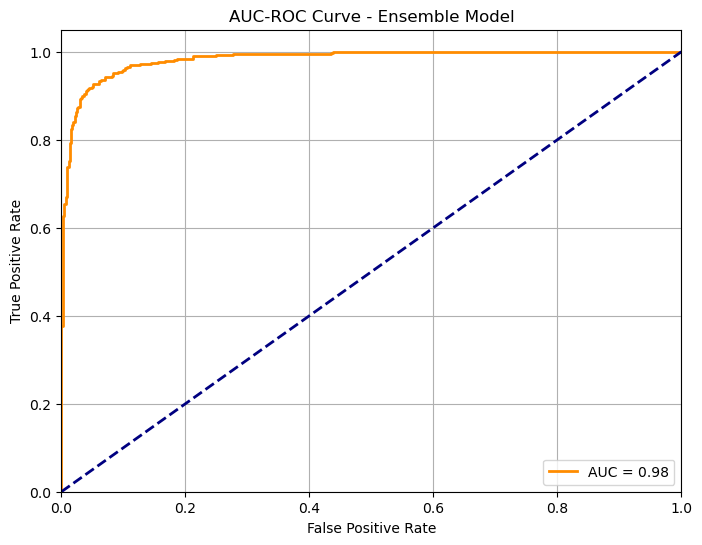

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create VotingClassifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', model_dt),
    ('random_forest', model_rf)
], voting='soft')  # Soft voting needed for predict_proba

# Train the ensemble model
ensemble_model.fit(xr_train1, yr_train1)

# Predict probabilities
y_proba = ensemble_model.predict_proba(xr_test1)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(yr_test1, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the AUC-ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


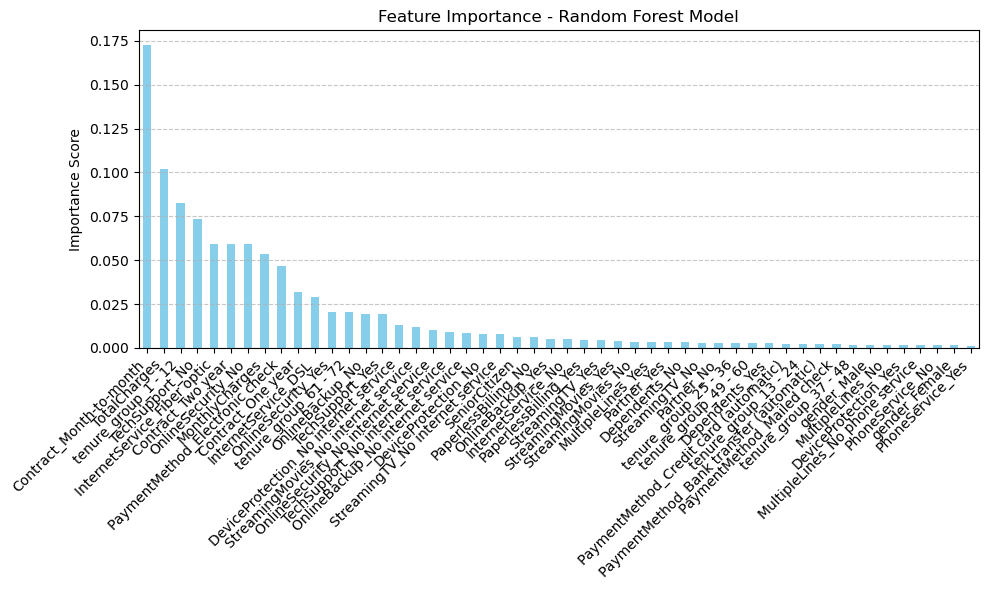

In [62]:
# Fit the Random Forest model if not already fitted
model_rf.fit(x_train, y_train)

# Now get feature importances from the Random Forest model
rf_importances = model_rf.feature_importances_

# Create a pandas Series for easy plotting
feature_names = xr_train1.columns
feat_imp_series = pd.Series(rf_importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp_series.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Random Forest Model")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
